In [1]:
import networkx as nx
import pandas as pd
import json
from itertools import combinations

In [43]:
criancas = pd.read_excel("./dados/output.xlsx",sheet_name='Crianças')
adultos = pd.read_excel("./dados/output.xlsx",sheet_name='Adultos')
contatos01 = json.load(open('./dados/contatos_dia1.json'))
contatos02 = json.load(open('./dados/contatos_dia2.json'))

In [21]:
G = nx.Graph()

In [26]:
for i,j in zip(criancas['id'].values,criancas['Idade'].values):
    G.add_node(i,weight = j)
for i,j in zip(adultos['id'].values,adultos['Idade'].values):
    G.add_node(i,weight = j)

In [30]:
edges = combinations(list(G.nodes), 2)

In [32]:
G.add_edges_from(edges)

In [58]:
contatos = {}
for i in contatos01:
    contatos[i] = []
    for j in contatos01[i]:
        if(j not in contatos[i]):
            contatos[i].append(j)
    for j in contatos02[i]:
        if(j not in contatos[i]):
            contatos[i].append(j)

In [62]:
def transform(i):
    if(i==1):
        return 2.5
    elif(i==2):
        return 10
    elif(i==3):
        return 75/2
    elif(i==4):
        return 90
    else:
        return 240
for site in contatos:
    for lig in contatos[site]:
        G.add_node(len(G.nodes)+1,weight = lig[3])
        G.add_edge(site, len(G.nodes)+1, weight=transform(lig[-1]))
        #if(lig[-2]==1)

KeyboardInterrupt: 

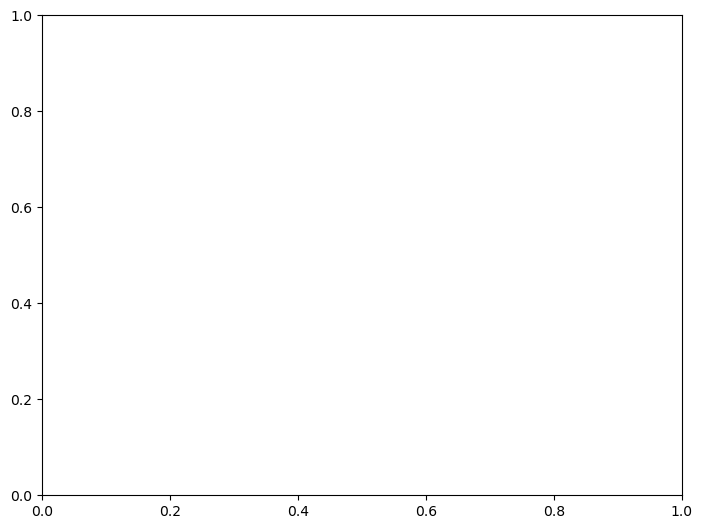

In [68]:
nx.draw(G,node_size = 20)

In [64]:
len(G.nodes)

65642

16384